In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyrqa.settings import Settings
from pyrqa.time_series import TimeSeries
from pyrqa.computation import RPComputation
from pyrqa.computation import RQAComputation
from pyrqa.metric import EuclideanMetric
from pyrqa.analysis_type import Classic
from pyrqa.neighbourhood import FixedRadius


In [3]:
df = pd.read_csv('../data/redd_active_value_f1hz.csv')
# Ensure 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Set the index as the timestamp
df.set_index('timestamp', inplace=True)

In [4]:
# Crear un objeto TimeSeries
time_series = TimeSeries(df['mains'].values[0:1000], # type: ignore
                         embedding_dimension=1,
                         time_delay=100) 


In [5]:
time_series.data.shape

(1000,)

In [6]:
# Configurar los parámetros para el cálculo de RQA
settings = Settings(time_series,
                    analysis_type=Classic,
                    similarity_measure=EuclideanMetric,
                    neighbourhood=FixedRadius(0.1),  # Ajustar según necesidad
                    )

c:\Users\DennysMallqui\anaconda3\envs\nilmtk-env\lib\site-packages\pyopencl\invoker.py:305: UserWarning: pytools.persistent_dict 'pyopencl-invoker-cache-v41': enabling safe_sync as default. This provides strong protection against data loss, but can be unnecessarily expensive for use cases such as caches.Pass 'safe_sync=False' if occasional data loss is tolerable. Pass 'safe_sync=True' to suppress this warning.
  invoker_cache = WriteOncePersistentDict(


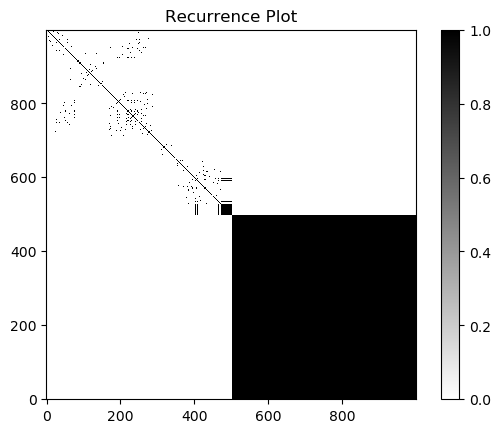

In [7]:

# Realizar el cálculo de RQA
computation = RPComputation.create(settings)
result = computation.run()

# Generar y mostrar el gráfico recurrente
plt.imshow(result.recurrence_matrix_reverse, cmap='binary', origin='lower')
plt.colorbar()
plt.title('Recurrence Plot')
plt.show()